<a href="https://colab.research.google.com/github/shreya0923/Predictive-Maintenance/blob/main/IOT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
data = pd.read_csv('PredictiveMaintenence.csv')
data

,Accelerometer,Temperature,freq_x,a_x,freq_y,a_y,freq_z,a_z,vib_x,vib_y,vib_z,AnomalyDetect,AnomalyType
0,62.99,123.27,99.36,0.0054,62.92,0.0022,52.98,0.0069,18400.00000,28600.00000,7678.260870,0,0
1,61.40,125.86,86.42,0.0059,67.33,0.0028,50.14,0.0066,14647.45763,24046.42857,7596.969697,0,0
2,63.16,139.13,90.46,0.0045,68.20,0.0020,46.10,0.0070,20102.22222,34100.00000,6585.714286,0,0
3,50.00,131.37,90.84,0.0044,75.70,0.0029,51.93,0.0060,20645.45455,26103.44828,8655.000000,1,1
4,62.78,139.62,92.04,0.0058,74.15,0.0021,56.81,0.0066,15868.96552,35309.52381,8607.575758,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,15.00,133.51,87.43,0.0044,78.93,0.0028,57.64,0.0066,19870.45455,28189.28571,8733.333333,1,1
311,62.43,125.06,85.10,0.0043,74.99,0.0012,50.91,0.0071,19790.69767,62491.66667,7170.422535,0,0
312,64.75,126.29,92.86,0.0059,68.72,0.0020,54.27,0.0080,15738.98305,34360.00000,6783.750000,0,0
313,61.95,178.00,98.75,0.0053,69.10,0.0023,55.98,0.0073,18632.07547,30043.47826,7668.493151,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Accelerometer  315 non-null    float64
 1   Temperature    315 non-null    float64
 2   freq_x         315 non-null    float64
 3   a_x            315 non-null    float64
 4   freq_y         315 non-null    float64
 5   a_y            315 non-null    float64
 6   freq_z         315 non-null    float64
 7   a_z            315 non-null    float64
 8   vib_x          315 non-null    float64
 9   vib_y          315 non-null    float64
 10  vib_z          315 non-null    float64
 11  AnomalyDetect  315 non-null    int64  
 12  AnomalyType    315 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 32.1 KB


In [ ]:
data.describe()

,Accelerometer,Temperature,freq_x,a_x,freq_y,a_y,freq_z,a_z,vib_x,vib_y,vib_z,AnomalyDetect,AnomalyType
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,61.529587,130.865841,90.315206,0.005017,71.111175,0.001953,53.812381,0.006921,18525.211420,42631.541003,7809.117695,0.161905,0.434921
std,6.136602,9.017907,8.387810,0.000711,9.202331,0.000608,8.493499,0.000866,4491.338074,31436.388444,1610.990399,0.368950,1.127841
min,11.000000,120.150000,80.200000,0.001600,60.020000,0.000200,45.050000,0.000400,13827.586210,15918.750000,5710.000000,0.000000,0.000000
25%,60.995000,124.605000,84.485000,0.004500,65.730000,0.001400,49.535000,0.006600,16080.384615,28213.873625,6949.917688,0.000000,0.000000
50%,62.340000,130.140000,89.820000,0.005100,70.670000,0.001900,53.140000,0.007000,17822.916670,37068.421050,7588.709677,0.000000,0.000000
75%,63.750000,135.015000,94.535000,0.005600,76.065000,0.002500,56.570000,0.007450,20096.763285,49643.750000,8287.178309,0.000000,0.000000
max,65.000000,201.000000,183.000000,0.006000,180.000000,0.003000,164.000000,0.008000,55000.000000,410000.000000,21354.166670,1.000000,5.000000


In [ ]:
df = data
data.drop(['freq_x', 'a_x', 'freq_y', 'a_y', 'freq_z', 'a_z'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Accelerometer  315 non-null    float64
 1   Temperature    315 non-null    float64
 2   vib_x          315 non-null    float64
 3   vib_y          315 non-null    float64
 4   vib_z          315 non-null    float64
 5   AnomalyDetect  315 non-null    int64  
 6   AnomalyType    315 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 17.4 KB


In [ ]:
# To check for anymissing or duplicate values

print('Missing values in the dataset : ',data.isna().sum().sum())
print('Duplicate values in the dataset : ',data.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  9


In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data['AnomalyDetect'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'AnomalyDetect', data = data)
plt.show()

# Training the actual prediction model

In [ ]:
y_train = data.iloc[:,5]
y_train

0      0
1      0
2      0
3      1
4      0
      ..
310    1
311    0
312    0
313    1
314    0
Name: AnomalyDetect, Length: 315, dtype: int64

In [ ]:
x_train = data.iloc[:,0:5]
x_train

,Accelerometer,Temperature,vib_x,vib_y,vib_z
0,62.99,123.27,18400.00000,28600.00000,7678.260870
1,61.40,125.86,14647.45763,24046.42857,7596.969697
2,63.16,139.13,20102.22222,34100.00000,6585.714286
3,50.00,131.37,20645.45455,26103.44828,8655.000000
4,62.78,139.62,15868.96552,35309.52381,8607.575758
...,...,...,...,...,...
310,15.00,133.51,19870.45455,28189.28571,8733.333333
311,62.43,125.06,19790.69767,62491.66667,7170.422535
312,64.75,126.29,15738.98305,34360.00000,6783.750000
313,61.95,178.00,18632.07547,30043.47826,7668.493151


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)

In [ ]:
KNN = KNeighborsClassifier

In [ ]:
np.all(np.isfinite(x_train))

True

In [ ]:
knn = KNN(n_neighbors=3)

# fit the model to the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_train)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
data.insert(6,'AnomalyPred', y_pred )

In [ ]:
data

,Accelerometer,Temperature,vib_x,vib_y,vib_z,AnomalyDetect,AnomalyPred,AnomalyType
0,62.99,123.27,18400.00000,28600.00000,7678.260870,0,0,0
1,61.40,125.86,14647.45763,24046.42857,7596.969697,0,0,0
2,63.16,139.13,20102.22222,34100.00000,6585.714286,0,0,0
3,50.00,131.37,20645.45455,26103.44828,8655.000000,1,0,1
4,62.78,139.62,15868.96552,35309.52381,8607.575758,0,0,0
...,...,...,...,...,...,...,...,...
310,15.00,133.51,19870.45455,28189.28571,8733.333333,1,1,1
311,62.43,125.06,19790.69767,62491.66667,7170.422535,0,0,0
312,64.75,126.29,15738.98305,34360.00000,6783.750000,0,0,0
313,61.95,178.00,18632.07547,30043.47826,7668.493151,1,0,2


In [ ]:
knn.predict_proba(x_train)[:,0]

array([1.        , 0.66666667, 1.        , 0.66666667, 0.66666667,
       0.66666667, 0.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.66666667, 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 0.66666667, 1.        , 0.66666667, 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 0.66666667, 0.66666667, 0.66666667,
       1.        , 0.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score: 0.9016


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred)

print('Confusion matrix\n\n', cm)
TP = cm[0,0]
print('\nTrue Positives(TP) = ', TP)
TN = cm[1,1]
print('\nTrue Negatives(TN) = ', TN)
FP = cm[0,1]
print('\nFalse Positives(FP) = ', FP)
FN = cm[1,0]
print('\nFalse Negatives(FN) = ', FN)

Confusion matrix

 [[262   2]
 [ 29  22]]

True Positives(TP) =  262

True Negatives(TN) =  22

False Positives(FP) =  2

False Negatives(FN) =  29


<Axes: >

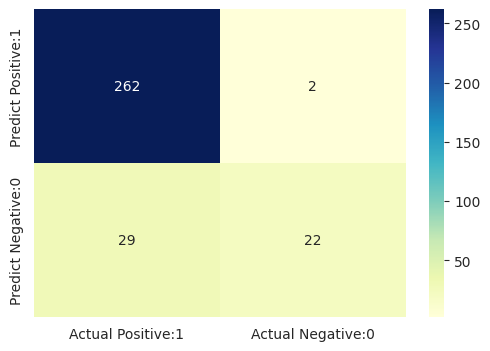

In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0984


In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9924


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# Making a linear Regression model for predictin of maintainence

In [ ]:
import pandas
from sklearn import linear_model

In [ ]:
X = data.iloc[:,0:5]
y = data.iloc[:,7]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

In [ ]:
y_pred_linreg = regr.predict(X)
y_pred_linreg

In [ ]:
plt.scatter(y, y_pred_linreg);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
sns.regplot(x=y, y=y_pred_linreg, ci=None, color ='red');

# Taking the value using MQTT

In [ ]:
!sudo pip install paho-mqtt
!sudo apt-get install python-dev

In [ ]:
import os
import time
import sys
import paho.mqtt.client as mqtt
import json
import random

In [ ]:
def on_connect(client, userdata, flags, rc):
    print('CONNACK received with code %d.' % (rc))

In [ ]:
import paho

In [ ]:
client = mqtt.Client()
client.on_connect = on_connect
client.connect('broker.hivemq.com', 1883)

In [ ]:
mqtt.Client(client_id='1', clean_session=True, userdata=None, protocol=mqtt.MQTTv31)

In [ ]:
msg = None

In [ ]:
def on_publish(client, userdata, mid):
    print("mid: "+str(mid))

In [ ]:
def run():
    client = connect_mqtt()
    subscribe(client)
    client.loop_forever()

In [ ]:
client = mqtt.Client()
client.on_publish = on_publish
client.connect('broker.mqttdashboard.com', 1883)
client.loop_start()

In [ ]:
def on_message(client, userdata, message):
    print("received message: " ,str(message.payload.decode("utf-8")))

In [ ]:
def subscribe(client):
    def on_message(client, userdata, msg):
        print(f"Received `{msg.payload.decode()}` from `{msg.topic}` topic")

In [ ]:
def connect_mqtt() -> client:
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Connected to MQTT Broker!")
        else:
            print("Failed to connect, return code %d\n", rc)

In [ ]:
topic = "Machine"

In [ ]:
client.subscribe(topic)
client.on_message = on_message

In [ ]:
iterations = 0
while True:
    if msg is not None and hasattr(msg, 'payload'):
        characters = [chr(ascii) for ascii in msg.payload] # Convert ASCII to char
        chars_joined = ''.join(characters) # Join chars to a string
        splitted = chars_joined.split(",")
        acc = splitted[0]
        temp = splitted[1]
        freq_x = splitted[2]
        a_x = splitted[3]
        freq_y = splitted[4]
        a_y = splitted[5]
        freq_z = splitted[6]
        a_z = splitted[7]
    else:
        print("msg is None or does not have a payload attribute.")
        continue

    iterations += 1
    if iterations >= 10: # limit the number of iterations to 10
        break

    time.sleep(30)

In [ ]:
vib_x = freq_x/a_x
vib_y = freq_y/a_y
vib_z = freq_z/a_z

# Testing data

In [ ]:
import random

In [ ]:
acc1 = 40+(random.random()*35)
temp1 = 150+(random.random()*25)
freq_x1 = 80+(random.random()*25)
a_x1 = random.random()*0.002
freq_y1 = 60+(random.random()*10)
a_y1 = random.random()*0.001
freq_z1 = 50+(random.random()*10)
a_z1 = random.random()*0.006

In [ ]:
vib_x1 = freq_x/a_x
vib_y1 = freq_y/a_y
vib_z1 = freq_z/a_z

In [ ]:
acc2 = 40+(random.random()*35)
temp2 = 150+(random.random()*25)
freq_x2 = 80+(random.random()*25)
a_x2 = random.random()*0.002
freq_y2 = 60+(random.random()*10)
a_y2 = random.random()*0.001
freq_z2 = 50+(random.random()*10)
a_z2 = random.random()*0.006

In [ ]:
vib_x2 = freq_x/a_x
vib_y2 = freq_y/a_y
vib_z2 = freq_z/a_z

In [ ]:
x_test = [[acc1, temp1, vib_x1, vib_y1, vib_z1], [acc2, temp2, vib_x2, vib_y2, vib_z2]]
x_test

In [ ]:
y_pred_test = knn.predict(x_test)

In [ ]:
y_pred_test

# Sending an alert

In [ ]:
pip install telebot

In [ ]:
pip install telebot

In [ ]:
pip install telethon

In [ ]:
import telebot
from telethon.sync import TelegramClient
from telethon.tl.types import InputPeerUser, InputPeerChannel
from telethon import TelegramClient, sync, events

In [ ]:
api_id = '24804615'
api_hash = 'd5c6f0ad6aaa15006851468f6a064eda'
token = '5627588564:AAGrYQQJMky9q3XbMRg68JZ08ZIvuFboQT4'
message = "Working..."

In [ ]:
phone = '+919825629359'

client = TelegramClient('session', api_id, api_hash)

client.connect()

In [ ]:
import urllib.request

In [ ]:
webUrl = urllib.request.urlopen('https://api.telegram.org/bot5627588564:AAGrYQQJMky9q3XbMRg68JZ08ZIvuFboQT4/sendMessage?chat_id=1839649176&text=MaintainenceRequired')